In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import itertools as it
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
def diff(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    return 2*np.linalg.norm(a - b)/np.linalg.norm(a + b)

## Basic properties

In [2]:
mesh = Fourier(10, (2, 5))
X, = mesh.grid()
u = TensorField(mesh, np.random.randn(*mesh.shape))
x = np.linspace(*mesh.endpoints, 3000)

In [3]:
print(diff(u.func, u().func))
print(diff(u.func, u(None).func))
print(diff(u.func, u(X)))
print(diff(u.func, np.interp(X, x, u(x))))

0.0
0.0
4.54647235637e-15
6.19026348755e-06


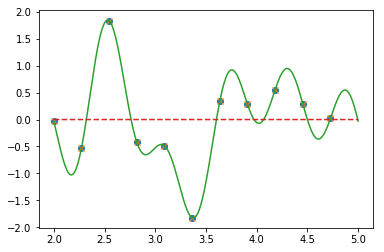

In [4]:
plt.plot(X, u.func, 'o')
plt.plot(X, u(X).real, 'x')
plt.plot(x, u(x).real)
plt.plot(x, u(x).imag, '--')
plt.show()

In [5]:
mesh2 = Fourier(55, mesh.endpoints)
u2 = u.remesh(mesh2)
X2, = mesh2.grid()
diff(u2.remesh(mesh).func, u.func)

6.0077673728606817e-15

In [6]:
diff(u2(x), u(x))

1.597701710275799e-15

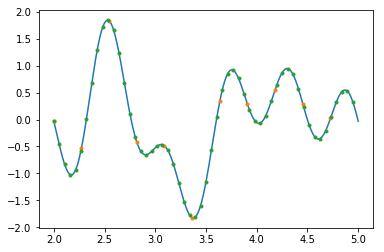

In [7]:
plt.plot(x, u(x))
plt.plot(X, u.func, '.')
plt.plot(X2, u2.func, '.')
plt.show()

## Arithmetic

In [8]:
u1 = TensorField(mesh, np.random.randn(2, 3, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(3, *mesh.shape))
u3 = TensorField(mesh, np.random.randn(*mesh.shape))
c = np.random.randn()
diff((c*u1*u2*u3).func, c*u1.func*u2.func*u3.func)

0.0

In [9]:
diff((u/c).func, u.func/c)

0.0

In [10]:
[diff((u**i).func, u.func**i) for i in range(1, 5)]

[0.0, 0.0, 0.0, 0.0]

In [11]:
diff((u1 + u2 - u3 + c).func, u1.func + u2.func - u3.func + c)

0.0

In [12]:
[diff((u + c).func, u.func + c),
 diff((u - c).func, u.func - c),
 diff((c + u).func, u.func + c),
 diff((c + u).func, u.func + c),
 diff((-u).func, -u.func)]

[0.0, 0.0, 0.0, 0.0, 0.0]

## Differentiate

In [13]:
x = np.linspace(*mesh.endpoints, 10000)
du = u.diff()
diff_num = np.gradient(u(x), x, edge_order=2)
diff(diff_num, du(x))

1.4359044859730979e-06

## Integrate

In [14]:
x = np.linspace(*mesh.endpoints, 3000)
int_num = sp.integrate.simps(u(x), x)
diff(u.int(), int_num)

2.0709321244659581e-07

In [15]:
u2 = u.remesh(Fourier(mesh.N + 1, mesh.endpoints))
int_num = sp.integrate.simps(u2(x)**2, x)
diff((u2**2).int(), int_num)

4.7276357068372581e-09

NameError: name 'sp' is not defined